In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.load("data/data_X.npy")
y = np.load("data/data_Y.npy")

[1. 8.]


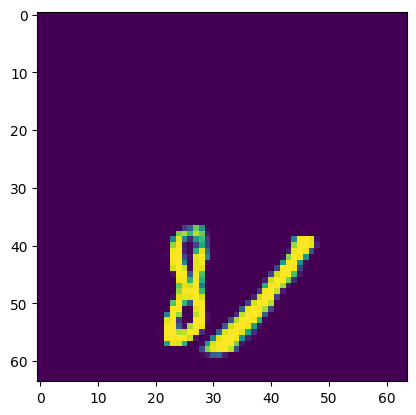

In [3]:
print(y[1000])

plt.imshow(x[1000])

# Analysis

Given problem is a classification one.

Check labels

In [4]:
df = pd.DataFrame(y, columns=["first", "second"])
df.isna().sum()

first     2000
second    2000
dtype: int64

Get null lables's indicies

In [5]:
df["is_null"] = df["first"].isna() | df["second"].isna()
df[df["is_null"]].head()

,first,second,is_null
1,NaN,NaN,True
14,NaN,NaN,True
66,NaN,NaN,True
128,NaN,NaN,True
169,NaN,NaN,True


Check data itself from those indicies

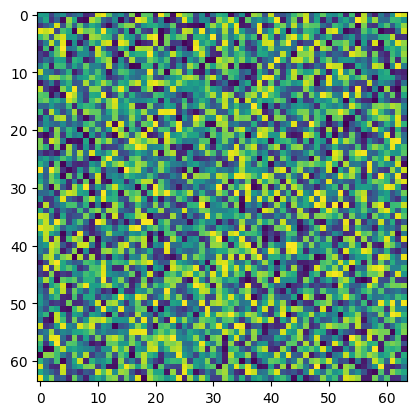

In [6]:
plt.imshow(x[1])

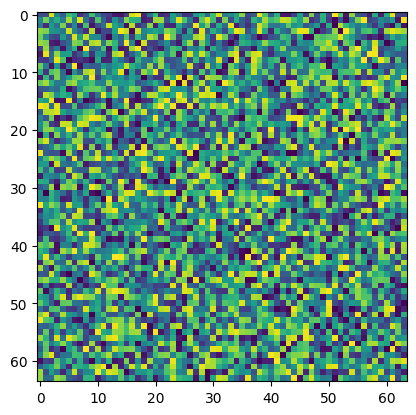

In [7]:
plt.imshow(x[14])

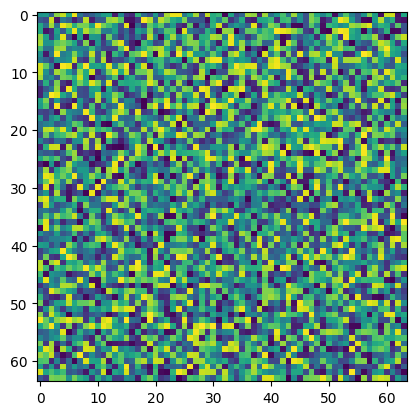

In [8]:
plt.imshow(x[66])

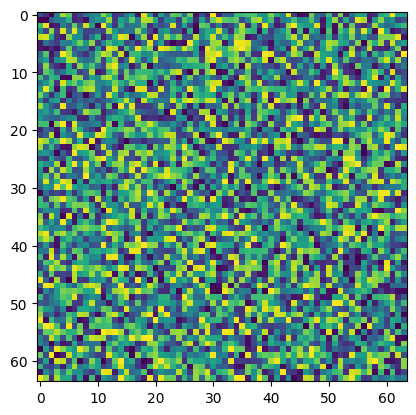

In [9]:
plt.imshow(x[128])

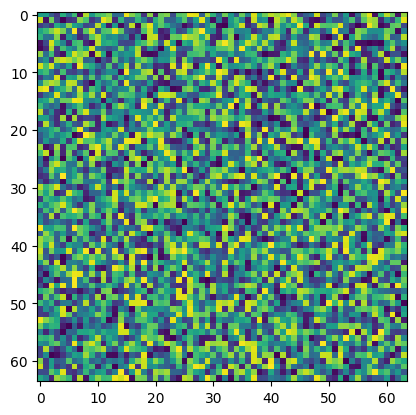

In [10]:
plt.imshow(x[169])

From the above plots, we can say noise data points have null labels.

Text(0.5, 1.0, 'Labels Distribution')

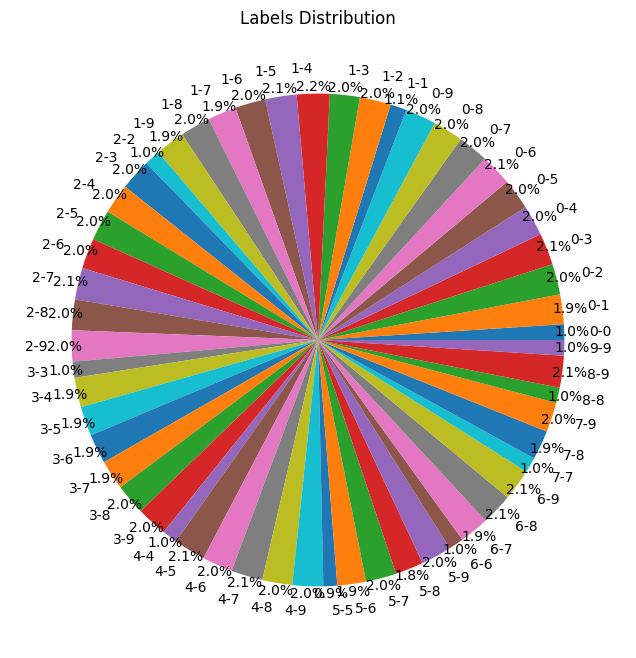

In [11]:
counts = (
    df[~df.isna()].groupby(["first", "second"]).size().reset_index(name="counts")
)
counts["pair"] = (
    counts["first"].map(lambda x: str(int(x)))
    + "-"
    + counts["second"].map(lambda x: str(int(x)))
)

labels = counts["pair"]
sizes = counts["counts"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", pctdistance=1.03, startangle=0)
plt.title("Labels Distribution")

From the above plots, we can hardly see any imbalance.

Prepare data for model building

In [12]:
clean_idx = df[df["is_null"] == False].index

clean_X = x[clean_idx]
clean_Y = np.stack(
    [np.array(df["first"][clean_idx]), np.array(df["second"][clean_idx])], axis=1
)

Split dataset into train, val and test set.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
clean_X.shape

(60000, 64, 64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    clean_X, clean_Y, test_size=1 / 6, random_state=42
)

In [17]:
X_test.shape

(10000, 64, 64)

In [ ]:
np.save("data/X_test.npy", X_test)
np.save("data/Y_test.npy", y_test)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [20]:
X_train.shape

(40000, 64, 64)

In [ ]:
np.save("data/X_train.npy", X_train)
np.save("data/X_val.npy", X_val)
np.save("data/Y_train.npy", y_train)
np.save("data/Y_val.npy", y_val)